In [159]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import csv
import pandas as pd


In [160]:
with open("output_metrics_3.pickle", "rb") as f:
    answer = pickle.load(f)


In [161]:
answer.keys() #(window_size, N_clusters)

dict_keys([(1, 5), (1, 7), (1, 9), (1, 11), (5, 5), (5, 7), (5, 9), (5, 11), (10, 5), (10, 7), (10, 9), (10, 11), (15, 5), (15, 7), (15, 9), (15, 11)])

In [162]:
contents = answer[list(answer.keys())[0]][0].split()
contents = {x:i for i, x in enumerate(contents)}
contents

{'str': 0,
 'cluster_metrics': 1,
 'clusters_model': 2,
 'metrics': 3,
 'clusters_sizes': 4,
 'weighted_mase': 5,
 'weighted_mape': 6}

In [163]:
Ns_clusters = np.unique([key[1] for key in answer])
window_sizes = np.unique([key[0] for key in answer])
Ns_clusters, window_sizes

(array([ 5,  7,  9, 11]), array([ 1,  5, 10, 15]))

**Кластеризация** 

Davies–Bouldin Index

In [164]:
# for key, value in answer.items():
#     print(f"{value[contents['cluster_metrics']]['DB']:.3f} - {key}")

In [166]:
DB = pd.read_csv("clusters_metrics.csv")

In [167]:
DB

,,5,7,9,11
0,1,0.558344,0.585574,0.882396,0.932732
1,5,0.561880,0.706185,0.885601,0.785618
2,10,0.563606,0.588997,0.660601,0.972407
3,15,0.719202,0.764277,0.892269,0.977697


In [168]:
DB.columns

Index([' ', '5', '7', '9', '11'], dtype='object')

In [180]:
Ns = np.unique(np.array(DB.columns[1:], dtype=int))
Ns

array([ 5,  7,  9, 11])

In [181]:
Ws = np.unique(np.array(DB.iloc[:, 0]))
Ws

array([ 1,  5, 10, 15])

In [182]:
DB_dict = {(int(DB.iloc[i, 0]), int(DB.columns[j])): DB.iloc[i, j] for i in range(DB.shape[0]) for j in range(1, DB.shape[1])}

In [195]:
DB_dict

{(1, 5): 0.5583441440832193,
 (1, 7): 0.585574324860686,
 (1, 9): 0.8823964995632029,
 (1, 11): 0.9327322028137632,
 (5, 5): 0.5618804630529324,
 (5, 7): 0.7061854569818424,
 (5, 9): 0.8856006712696274,
 (5, 11): 0.785618329193606,
 (10, 5): 0.5636063457514211,
 (10, 7): 0.588996973976795,
 (10, 9): 0.6606010166964151,
 (10, 11): 0.9724067660036289,
 (15, 5): 0.7192023446870373,
 (15, 7): 0.7642768397963818,
 (15, 9): 0.8922693959032623,
 (15, 11): 0.9776972641212122}

In [184]:
# [[(key, value, DB.loc[str(key[1])]) for key, value in answer.items() if key[0] == W] for W in Ws]


In [185]:
# a = [[DB_dict[key] for key, value in DB_dict.items() if key[0] == W] for W in Ws]


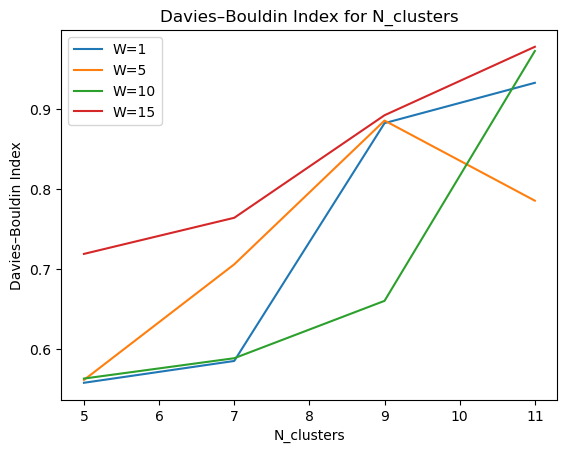

In [190]:
for w in Ws:
    cur = [DB_dict[(w, n)] for n in Ns]
    plt.plot(Ns, cur, label="W="+str(w))
plt.title("Davies–Bouldin Index for N_clusters")
plt.xlabel("N_clusters")
plt.ylabel("Davies–Bouldin Index")
plt.legend()
plt.show()

In [188]:
# a = [[value[contents['cluster_metrics']]["DB"] for key, value in answer.items() if key[1] == C] for C in Ns_clusters]


[0.5583441440832193, 0.5618804630529324, 0.5636063457514211, 0.7192023446870373]
[0.585574324860686, 0.7061854569818424, 0.588996973976795, 0.7642768397963818]
[0.8823964995632029, 0.8856006712696274, 0.6606010166964151, 0.8922693959032623]
[0.9327322028137632, 0.785618329193606, 0.9724067660036289, 0.9776972641212122]


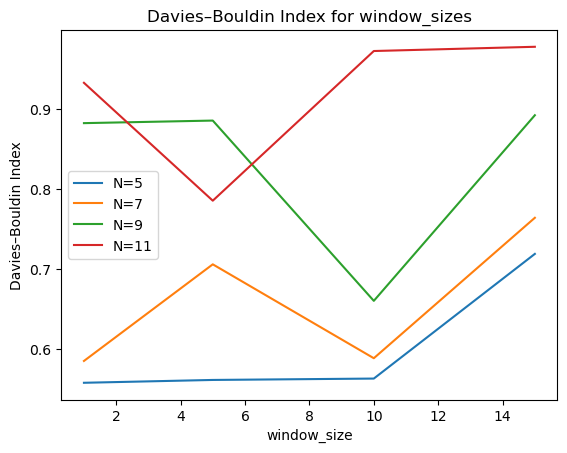

In [196]:
for n in Ns:
    cur = [DB_dict[(w, n)] for w in Ws]
    print(cur)
    plt.plot(Ws, cur, label="N="+str(n))
plt.legend()
plt.title("Davies–Bouldin Index for window_sizes")
plt.xlabel("window_size")
plt.ylabel("Davies–Bouldin Index")
plt.show()

**MAPE**

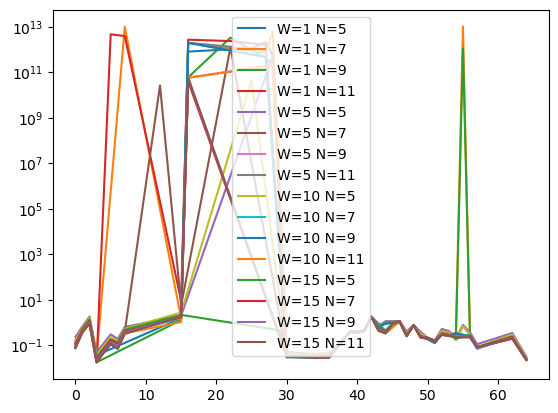

In [197]:
# a = answer[(15, 11)][contents['weighted_mape']]
for key, value in answer.items():
    a = value[contents['weighted_mape']]
    mask = (a <= np.percentile(a, 50))
    plt.yscale("log")
    plt.plot(np.arange(a.shape[0])[mask], a[mask], label="W="+str(key[0])+" N="+str(key[1]))
plt.legend()
# plt.plot(a[a <= np.percentile(a, 100)])
plt.show()

In [198]:
# a = answer[][contents['weighted_mape']]
# mask = (a <= np.percentile(a, 50))
# plt.yscale("log")
# plt.plot(np.arange(a.shape[0])[mask], a[mask], label="W="+str(key[0])+" N="+str(key[1]))
# plt.title("best 50% weighted MAPE on W=15,N=9")
# plt.show()

In [199]:
answer.keys()

dict_keys([(1, 5), (1, 7), (1, 9), (1, 11), (5, 5), (5, 7), (5, 9), (5, 11), (10, 5), (10, 7), (10, 9), (10, 11), (15, 5), (15, 7), (15, 9), (15, 11)])

[ 1  5 10 15]
(4, 65)
(65,)
(4, 65)
(65,)
(4, 65)
(65,)
(4, 65)
(65,)


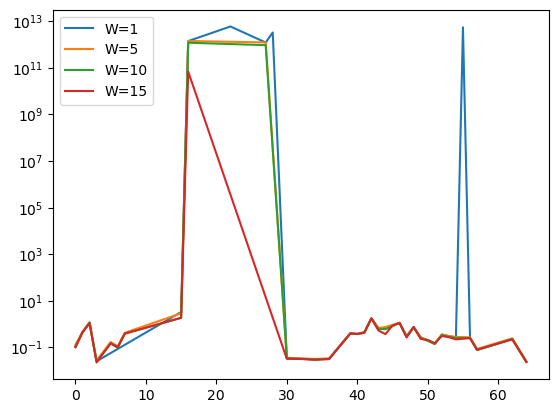

In [201]:
# a = [[value[contents['weighted_mape']] for key, value in answer.items() if key[0] == W] for W in window_sizes]
print(window_sizes)
for i in range(len(window_sizes)):
#     print(*a[i])
    a = np.array([value[contents['weighted_mape']] for key, value in answer.items() if key[0] == window_sizes[i]])
    print(a.shape)
    a = np.mean(a, axis=0) 
    print(a.shape)
    mask = (a <= np.percentile(a, 50))
    plt.plot(np.arange(a.shape[0])[mask], a[mask], label="W="+str(window_sizes[i]))
plt.legend()
plt.yscale("log")
plt.show()


**MASE**


In [22]:
contents

{'str': 0,
 'cluster_metrics': 1,
 'clusters_model': 2,
 'metrics': 3,
 'clusters_sizes': 4,
 'weighted_mase': 5,
 'weighted_mape': 6}

Прогноз по кластерам

In [23]:
answer[(10, 9)][contents['metrics']][0].keys()

dict_keys(['mae', 'mape', 'mase'])

In [24]:
for w in window_sizes:
    for n in Ns_clusters:
        maes = np.array([answer[(w, n)][contents['metrics']][cluster_num]['mae'] for cluster_num in range(n)])
        #Как тебя сводить во что-то презентабельное?

In [206]:
for w in window_sizes:
    for n in Ns_clusters:
        for cluster_num in range(n):
            tmp_metrics = answer[(w, n)][contents['metrics']][cluster_num]
            plt.plot(tmp_metrics['mase'])
            plt.yscale("log")
            plt.title(f"MASE: N={n}, W={w}, {cluster_num=}")
            plt.xlabel("features")
            plt.ylabel("metric")
            plt.savefig(f"plots/MASE/N={n}, W={w}, {cluster_num=}")
#             plt.show()
            plt.clf()

<Figure size 640x480 with 0 Axes>

In [207]:
for w in window_sizes:
    for n in Ns_clusters:
        for cluster_num in range(n):
            tmp_metrics = answer[(w, n)][contents['metrics']][cluster_num]
            plt.plot(tmp_metrics['mae'])
            plt.yscale("log")
            plt.title(f"MAE: N={n}, W={w}, {cluster_num=}")
            plt.xlabel("features")
            plt.ylabel("metric")
            plt.savefig(f"plots/MAE/N={n}, W={w}, {cluster_num=}")
            plt.clf()

<Figure size 640x480 with 0 Axes>

In [209]:
# for key, value in answer.items():
#     a = value[contents['weighted_mase']]
#     mask = (a <= np.percentile(a, 50))
#     plt.yscale("log")
#     plt.plot(np.arange(a.shape[0])[mask], a[mask], label="W="+str(key[0])+" N="+str(key[1]))
# plt.legend()
# plt.title("best 50% MASE")
# plt.show()


In [210]:
# a = answer[(15, 7)][contents['weighted_mase']]
# mask = (a <= np.percentile(a, 50))
# plt.yscale("log")
# plt.plot(np.arange(a.shape[0])[mask], a[mask], label="W="+str(key[0])+" N="+str(key[1]))
# plt.title("best 50% MASE W=15, N=7")
# plt.show()

Text(0.5, 1.0, 'MAPE on clusters')

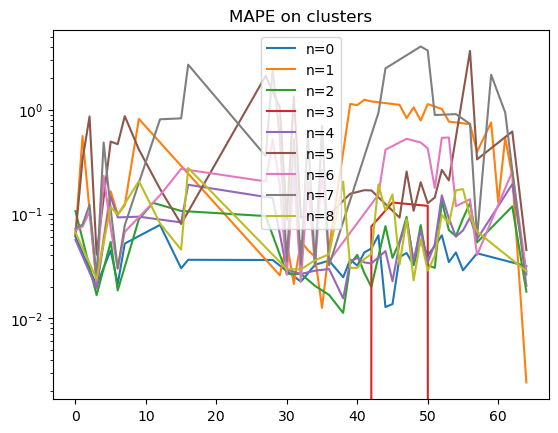

In [211]:
cur_N = 9
cur_W = 10
for n in range(cur_N):
    a = answer[(cur_W, cur_N)][contents['metrics']][n]['mape']
    mask = (a <= np.percentile(a, 50))
    plt.yscale("log")
    plt.plot(np.arange(a.shape[0])[mask], a[mask], label="n="+str(n))
plt.legend()
plt.title("MAPE on clusters")

Text(0.5, 1.0, 'MASE on clusters')

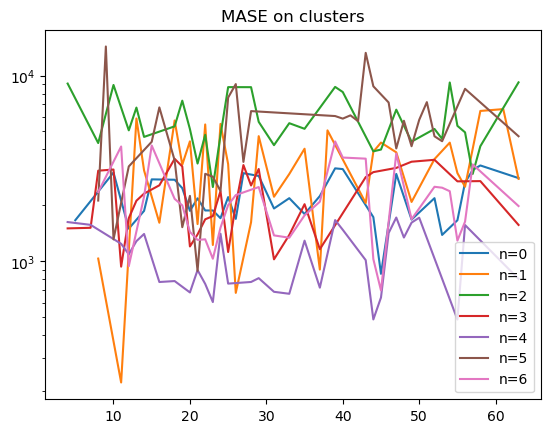

In [213]:
cur_N = 7
cur_W = 15
for n in range(cur_N):
    a = answer[(cur_W, cur_N)][contents['metrics']][n]['mase']
    mask = (a <= np.percentile(a, 50))
    plt.yscale("log")
    plt.plot(np.arange(a.shape[0])[mask], a[mask], label="n="+str(n))
plt.legend()
plt.title("MASE on clusters")

<BarContainer object of 7 artists>

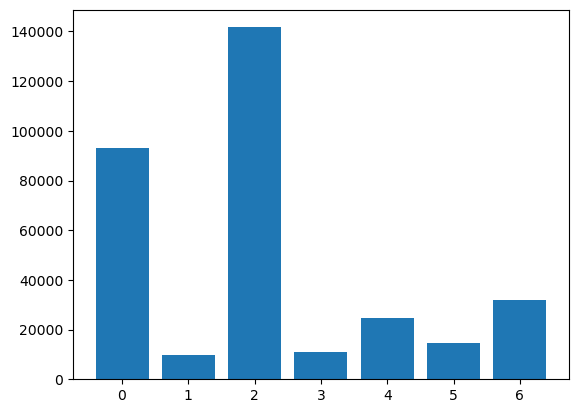

In [214]:
plt.bar(np.arange(cur_N), answer[(cur_W, cur_N)][contents['clusters_sizes']])


In [33]:
import pandas as pd

In [216]:
data = pd.read_csv("./output_table4.csv")


In [217]:
data.columns

Index(['real 0', 'real 1', 'real 2', 'real 3', 'real 4', 'real 5', 'real 6',
       'real 7', 'real 8', 'real 9',
       ...
       'predicted 57', 'predicted 58', 'predicted 59', 'predicted 60',
       'predicted 61', 'predicted 62', 'predicted 63', 'predicted 64',
       'cluster_num', 'mode'],
      dtype='object', length=132)

In [218]:
data_np = data.to_numpy()

In [219]:
Q = (data_np.shape[-1] - 2) // 2
Q

65

In [236]:
MODE = 3

In [240]:
cur_mase

array([1633.6392591 , 1069.56199136,  836.38889702,  675.84972235,
         51.02531525,  134.87474746,  290.2375242 ,   57.39269174,
         52.46761142,  268.50522535,   66.74739265,  127.14089463,
         47.68566507,   81.96762567,   49.0743092 ,  103.4845808 ,
         69.16623156,  344.97837349,   58.2502693 ,   70.06964315,
         49.97083783,   36.65389879,   60.13852436,   33.91977723,
         57.53970469,   55.52746131,   74.04281115,   74.56992465,
         47.30366403,   66.87215189,   93.03245542,   44.55071918,
        102.73099306,   66.01801825,  109.35200774,   60.89203145,
        120.03382863,   60.68794725,  167.04267257,   52.27858585,
         48.84622464,   53.31130546,   47.60801988,   69.14988558,
         43.83821838,   47.52978452,   62.6026492 ,   59.00724494,
         49.68487313,   53.14703574,   45.68261334,   47.14283092,
         65.68319687,   45.88588138,   43.68612231,   51.48421964,
         43.1993565 ,   66.13480966,   22.67694669,   28.77937

In [249]:
for mode in range(4):
    a = data.loc[data["mode"] == mode].to_numpy()
    cur_mase = np.mean(np.abs(a[:, :Q] - a[:, Q:2*Q]), axis=0) / np.mean(np.abs(a[:-1, :Q] - a[1:, :Q]), axis=0)
    mask = cur_mase <= np.percentile(cur_mase, 50)
    print(np.mean(cur_mase[mask]))
    plt.plot(np.arange(cur_mase.shape[0])[mask], cur_mase[mask])
    plt.yscale("log")
    plt.xlabel("features")
    plt.ylabel("MASE")
    plt.title(f"best 50% MASE on {mode}; mean {np.mean(cur_mase[mask])}")
    # plt.show()
    plt.savefig(f"best MASE on {mode}.png")
    plt.clf()

156.88283237448533
140.7758705435865
155.4776831959334
48.2101393954361


<Figure size 640x480 with 0 Axes>

In [109]:
print(*[round(x, 2) for x in cur_mase[mask]])

0.49 0.67 1.38 0.46 1.13 0.54 1.35 1.48 0.77 1.56 1.4 1.5 1.13


In [110]:
np.arange(cur_mase.shape[0])[mask]

array([ 4, 12, 20, 21, 22, 23, 24, 27, 37, 55, 60, 61, 63])